# Weterani

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Poniższy zbiór danych zawiera dane dotyczące kampanii mailingowej mającej zachęcić ludzi do wysłania datków na pewne stowarzyszenie o weteranach. Zmienne, które oznaczają nasz `y` to `TARGET_B` - informacja o tym, czy osoba wysłała datek oraz `TARGET_D` - informacja o tym jaka była wysokość datku. Podczas uczenia będziemy modelować zmienną `TARGET_B` - ale pamiętamy żeby usunąć również zmienną `TARGET_D` z danych ;)  

Głównym problemem w przypadku tego zbioru jest przygotowanie go do uczenia - zbiór zawiera dużą ilość kolumn, ponadto ma bardzo dużo braków danych i zmiennych kategorycznych o wielu poziomach.  

Dokładny opis: https://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98dic.txt

In [15]:
data = pd.read_csv("C:\\j_python\\supervised_learning\\cup98LRN.txt", na_values=[" "])

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,NaN,NaN,3712,0,NaN,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,NaN,NaN,5202,0,NaN,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,NaN,NaN,0,0,NaN,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,NaN,NaN,2801,0,NaN,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,NaN,0,FL,33176,NaN,NaN,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [18]:
data.shape

(95412, 481)

In [25]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [32]:
y = data['TARGET_B']

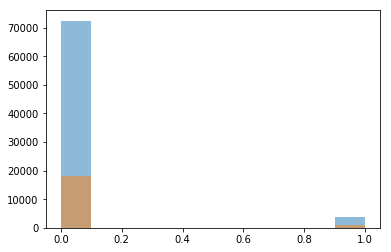

In [35]:
from sklearn.model_selection import train_test_split
train_data, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zad. 

Potencjalny plan działania:

0. wyciągnięcie kolumn `TARGET_D`, `TARGET_B` z ramki
1. Indentyfikacja kolumn o dużej ilości braków danych, oraz decyzja, co z nimi zrobić. Część kolumn można pewnie usunąć, resztą w jakiś sposób imputować. Warto zwrócić uwagę na kolumny, które mają tylko jeden poziom oraz wartość `NaN` - być może `NaN` jest również jakąś informacją.
2. Kolumny kategoryczne - część z nich ma ogromną liczbę poziomów - tutaj też trzeba podjąć jakąś decyzję (albo usunąć całą kolumnę, albo w jakiś sposób sobie z tym radzić). 
3. W tym momencie najprawdopodobniej będziemy mieli mniej kolumn - można zacząć myśleć o budowaniu modelu, ewentualnie poprzedzonego jakąś selekcją cech.
4. Walidacja modelu - sprawdzić, gdzie postawić najbardziej optymalny próg odcięcia. Obliczyć otrzymany zysk.

In [ ]:
from sklearn import  metrics

models = []
models.append(('SVM linear', grid_1.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))

In [ ]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM linear'])
df